In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, roc_curve, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.svm import SVC, LinearSVC #O(m**2.3 x n), O(mxn )
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, RandomForestClassifier, BaggingClassifier #rfcl Feature Imp.
from sklearn.base import TransformerMixin, BaseEstimator

#### Corr analysis

In [345]:
#corr_arr=X_train.corrwith(y_train)
dict_indx={}
list_keywords=[' workclass_',' education_',' marital-status_', ' occupation_',' relationship_',' race_',' sex_', ' native-country_', 'age',' fnlwgt', ' education-num', ' capital-gain', ' capital-loss',
       ' hours-per-week']
for i in list_keywords:
    dict_indx[i]=[(ind, round(corr_arr[ind],2)) for ind in corr_arr.index if i in ind]

Interestingly enough, whether or not someone is self employed in a corporate entity setting, is the best predictor of whether or not you will be payed more than $50K

In [346]:
dict_indx[' workclass_']

[(' workclass_ ?', -0.08),
 (' workclass_ Federal-gov', 0.06),
 (' workclass_ Local-gov', 0.03),
 (' workclass_ Never-worked', -0.01),
 (' workclass_ Private', -0.08),
 (' workclass_ Self-emp-inc', 0.14),
 (' workclass_ Self-emp-not-inc', 0.03),
 (' workclass_ State-gov', 0.01),
 (' workclass_ Without-pay', -0.01)]

It's clear that getting a Masters, Bachelors, or Doctorate, is of utmost importance if you want to make a decent wage above $50K

In [347]:
dict_indx[' education_']

[(' education_ 10th', -0.07),
 (' education_ 11th', -0.09),
 (' education_ 12th', -0.04),
 (' education_ 1st-4th', -0.03),
 (' education_ 5th-6th', -0.05),
 (' education_ 7th-8th', -0.06),
 (' education_ 9th', -0.06),
 (' education_ Assoc-acdm', 0.0),
 (' education_ Assoc-voc', 0.01),
 (' education_ Bachelors', 0.18),
 (' education_ Doctorate', 0.13),
 (' education_ HS-grad', -0.13),
 (' education_ Masters', 0.17),
 (' education_ Preschool', -0.02),
 (' education_ Prof-school', 0.15),
 (' education_ Some-college', -0.06)]

In [ ]:
Perhaps it's good to marry, or perhaps the younger folk who make less money simply are creating a bias in our data. What is surprising, however, is that income is correlated to whether or not your spouse is in the armed forces, a civilian, or if you divorced.

In [348]:
dict_indx[' marital-status_']

[(' marital-status_ Divorced', -0.13),
 (' marital-status_ Married-AF-spouse', 0.01),
 (' marital-status_ Married-civ-spouse', 0.44),
 (' marital-status_ Married-spouse-absent', -0.04),
 (' marital-status_ Never-married', -0.32),
 (' marital-status_ Separated', -0.07),
 (' marital-status_ Widowed', -0.06)]

It is easy to see that being in an executive/managerial position or having a specialty job is correlated with a >50K salary

In [349]:
dict_indx[' occupation_']

[(' occupation_ ?', -0.08),
 (' occupation_ Adm-clerical', -0.09),
 (' occupation_ Armed-Forces', -0.01),
 (' occupation_ Craft-repair', -0.01),
 (' occupation_ Exec-managerial', 0.21),
 (' occupation_ Farming-fishing', -0.05),
 (' occupation_ Handlers-cleaners', -0.09),
 (' occupation_ Machine-op-inspct', -0.07),
 (' occupation_ Other-service', -0.16),
 (' occupation_ Priv-house-serv', -0.04),
 (' occupation_ Prof-specialty', 0.19),
 (' occupation_ Protective-serv', 0.03),
 (' occupation_ Sales', 0.02),
 (' occupation_ Tech-support', 0.03),
 (' occupation_ Transport-moving', -0.02)]

Disregarding age bias, it's clear that being a male in a relationship is highly correlated to having a higher paying job

In [350]:
dict_indx[' relationship_']

[(' relationship_ Husband', 0.4),
 (' relationship_ Not-in-family', -0.19),
 (' relationship_ Other-relative', -0.08),
 (' relationship_ Own-child', -0.23),
 (' relationship_ Unmarried', -0.14),
 (' relationship_ Wife', 0.12)]

Being white has a slight correlation with higher earnings

In [351]:
dict_indx[' race_']

[(' race_ Amer-Indian-Eskimo', -0.03),
 (' race_ Asian-Pac-Islander', 0.01),
 (' race_ Black', -0.09),
 (' race_ Other', -0.03),
 (' race_ White', 0.09)]

As was seen from the marriage instances, being a male is highly correlated with an increased wage

In [352]:
dict_indx[' sex_']

[(' sex_ Female', -0.22), (' sex_ Male', 0.22)]

No strong correlations were found, despite that being of Mexican descent implied a salary under 50K, and being from the United States, implied a higher likelihood of earnings more than $50K

In [355]:
print(dict_indx[' native-country_'])

[(' native-country_ ?', 0.0), (' native-country_ Cambodia', 0.01), (' native-country_ Canada', 0.01), (' native-country_ China', 0.0), (' native-country_ Columbia', -0.02), (' native-country_ Cuba', 0.0), (' native-country_ Dominican-Republic', -0.02), (' native-country_ Ecuador', -0.01), (' native-country_ El-Salvador', -0.02), (' native-country_ England', 0.01), (' native-country_ France', 0.01), (' native-country_ Germany', 0.01), (' native-country_ Greece', 0.0), (' native-country_ Guatemala', -0.02), (' native-country_ Haiti', -0.01), (' native-country_ Holand-Netherlands', -0.0), (' native-country_ Honduras', -0.01), (' native-country_ Hong', 0.0), (' native-country_ Hungary', -0.0), (' native-country_ India', 0.02), (' native-country_ Iran', 0.02), (' native-country_ Ireland', -0.0), (' native-country_ Italy', 0.01), (' native-country_ Jamaica', -0.01), (' native-country_ Japan', 0.01), (' native-country_ Laos', -0.01), (' native-country_ Mexico', -0.06), (' native-country_ Nica

## As proposed earlier, age plays a significant role in the likelihood. So does education, capital gain/loss, and hours worked per week.

In [363]:
[print(dict_indx[i]) for i in list_keywords[8:]]

[(' occupation_ Exec-managerial', 0.21), ('age', 0.23)]
[(' fnlwgt', -0.01)]
[(' education-num', 0.34)]
[(' capital-gain', 0.22)]
[(' capital-loss', 0.15)]
[(' hours-per-week', 0.23)]


[None, None, None, None, None, None]

We will now drop the indices with the lowest correlation:

In [365]:
columns_keep=list(corr_arr[abs(corr_arr)>0.1].index) #If they have an absolute value of greater than .1:
X_train=X_train[columns_keep]

This leaves us with 84 less dimensions, as opposed to 108 initial dimensions!

## Data Analysis

In [294]:
df=pd.read_csv('income_evaluation.csv')
y_train=df[' income']
y_train=y_train==' >50K'
X_train=df.drop([' income'], axis=1)

In [295]:
X_train.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country'],
      dtype='object')

In [296]:
X_train.info(verbose=True, null_counts=True) #No null values, so no need to handle missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB
<ipython-input-296-c5d70de64e2c>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  X_train.info(verb

Use this for faster processing. We will be analyzing the columns however, so we will transform back to a dataframe.

In [141]:
def transform_data_to_array(df):
    col_transformer_min_max=ColumnTransformer([('one_hot', OneHotEncoder(), list_objs),
                                            ('min_max', MinMaxScaler(), list_nums)])
    sparse_arr=col_transformer_min_max.fit_transform(df)
    train_data=sparse_arr.toarray()

Now we one hot encode our data

In [300]:
def transform_data(df):
    global ohe
    global list_objs, list_nums
    list_nums=[column for column in df.columns if df[column].dtype==np.dtype('int')]
    list_objs=[column for column in df.columns if df[column].dtype==np.dtype('O')]
    ohe=OneHotEncoder()
    min_max_scaler=MinMaxScaler()

    arr1_sparse=ohe.fit_transform(df[list_objs])
    arr1=arr1_sparse.toarray()
    df1=pd.DataFrame(arr1, columns=ohe.get_feature_names())
    arr2=min_max_scaler.fit_transform(df[list_nums])
    df2=pd.DataFrame(arr2, columns=list_nums)
    df=pd.merge(df1,df2, left_index=True, right_index=True)
    return df

X_train=transform_data(X_train)

In [301]:
def rename_columns(df):
    for i in df.columns:
        if len(i.split('_'))>1:
            try:
                index=int(i.split('_')[0][-1])
                #print('{}_'.format(list_objs[index]) + i.split('_')[-1])
                df.rename(columns= { i : '{}_'.format(list_objs[index]) + i.split('_')[-1]} ,inplace=True)
            except Exception as x:
                print(x)
rename_columns(X_train)

Split into train, test

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, test_size=.05, random_state=41)

In [370]:
log_reg=LogisticRegression(max_iter=1000)
grid_log_reg={'penalty':['l2'], 'C':[1,0.1,1e-2,10,100] ,'tol':[1e-5, 1e-4]}
grid_log_reg_clf=GridSearchCV(log_reg, grid_log_reg, n_jobs=-1)
grid_log_reg_clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [1, 0.1, 0.01, 10, 100], 'penalty': ['l2'],
                         'tol': [1e-05, 0.0001]})

In [371]:
y_train_pred=grid_log_reg_clf.predict(X_train)

In [372]:
print(confusion_matrix(y_train_pred, y_train))

[[21907  3152]
 [ 1576  4297]]


In [373]:
y_scores=grid_log_reg_clf.decision_function(X_train)

In [374]:
def plt_roc(fpr, tpr, **kwargs):
    plt.plot(fpr, tpr)
    plt.show()

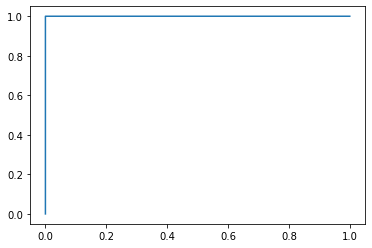

Area under curve: 0.903 ,out of 1


In [376]:
fpr,tpr, thresholds=roc_curve(y_train_pred, y_scores)
plt_roc(fpr, tpr)
print('Area under curve:',round(roc_auc_score(y_train, y_scores),3), 'out of 1')

.852 score without Dim reduction, and .847 despite nearly 1/4th the dimensions!

In [377]:
grid_log_reg_clf.best_estimator_.predict_proba(X_train) #Good for ensemble learning
grid_log_reg_clf.best_score_

0.8472455072641442

# SVCs

In [ ]:
linear_SVC=LinearSVC()